                                                                                              SHIVANI CHAUDHARY
                                                                                         DATA SCIENCE INTERN @LGMVIP
                                                                                           PROJECT LEVEL - INTERMEDIATE

# TASK 5

# Prediction using Decision Tree Algorithm 

# ABOUT THE PROJECT

1. It is a supervised machine learning algorithm, which can be used for both classification as well as regression. In this project, we will be using Decision Trees as a classifier.

2. The goal of this algorithm is to create a model that predicts the value of a target variable, for which the decision tree uses the tree representation to solve the problem. The leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

3. Leaf node refers to a node with zero children.

4. Internal nodes refer to nodes with children.

Data can be found at  https://bit.ly/3kXTdox

## IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## LOAD THE IRIS DATA

In [3]:
import seaborn as sns
iris = sns.load_dataset(r'C:\Users\hp\Downloads\Iris')

## PRINT THE FIRST FIVE ROWS

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PRINT THE LAST FIVE ROWS

In [5]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## PRINT THE RANDOM EIGHT ROW

In [6]:
iris.sample(8)

,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,virginica
131,7.9,3.8,6.4,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
8,4.4,2.9,1.4,0.2,setosa
97,6.2,2.9,4.3,1.3,versicolor
93,5.0,2.3,3.3,1.0,versicolor
149,5.9,3.0,5.1,1.8,virginica


## PROPERTIES AND SHAPE OF THE DATASET

In [7]:
# Full Summary of the dataframe
print(iris.info())             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [8]:
#Statistical Details of the Dataset
print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
#Shape of Dataset
print(iris.shape)

(150, 5)


## CHECK THE DATA FOR ANY NULL VALUES, COUNT THE NO. OF NULL VALUES IN EACH COLUMN

In [10]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
print("total number of null values = ",iris.isnull().sum().sum())

total number of null values =  0


## BOX PLOT

We can plot box plots using a categorical feature against a continuous feature, to understand how our data is distributed over the different features. Here, we have combined a stripplot to identify visible number of outliers also.

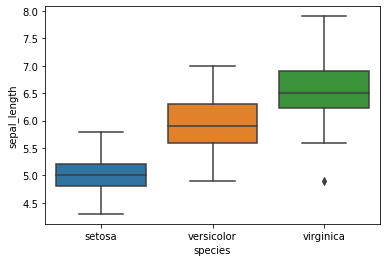

In [12]:
x = sns.boxplot(x="species", y="sepal_length",data=iris)

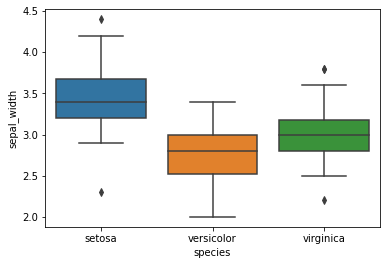

In [13]:
ax = sns.boxplot(x="species", y="sepal_width",data=iris)

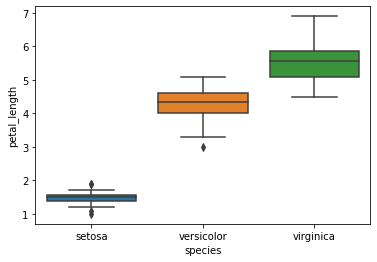

In [14]:
ax = sns.boxplot(x="species", y="petal_length",data=iris)

## SCATTER PLOT

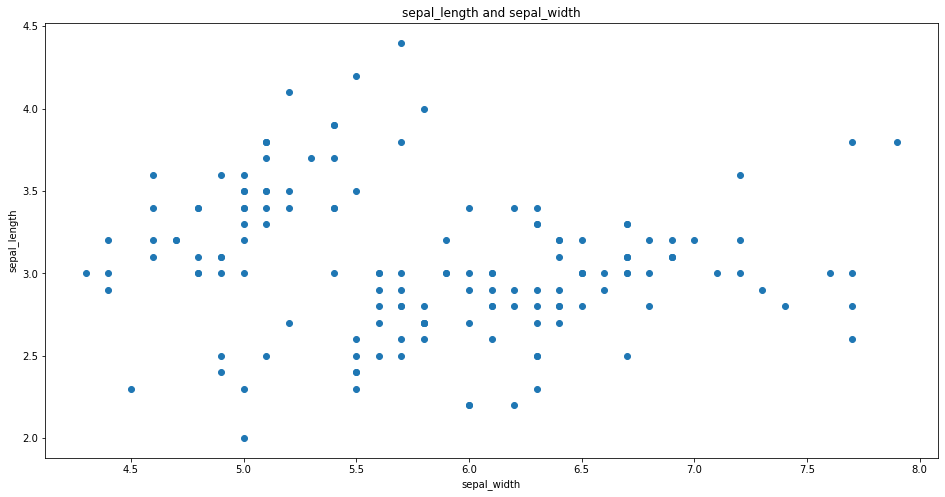

In [15]:
#Plotting the Distribution of Scores
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(iris['sepal_length'],iris['sepal_width'])            
plt.title('sepal_length and sepal_width') 
ax.set_ylabel('sepal_length')
ax.set_xlabel('sepal_width')
plt.show()

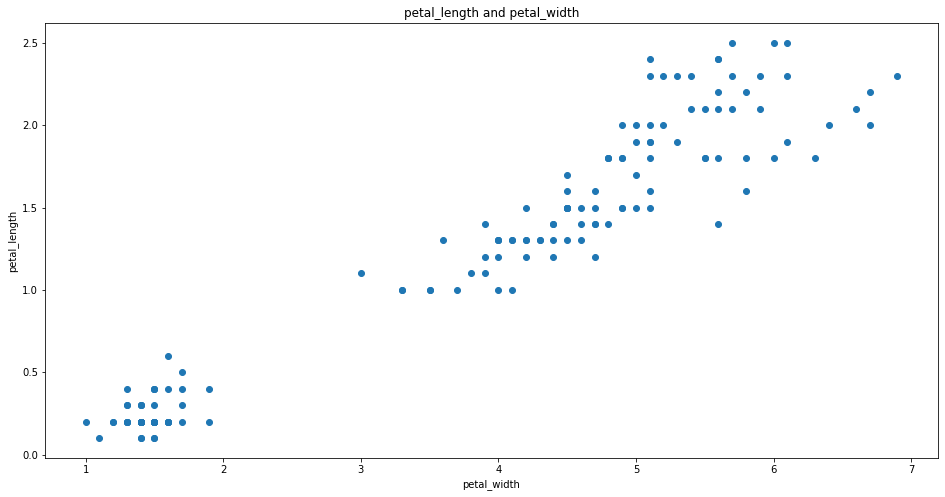

In [16]:
#Plotting the Distribution of Scores
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(iris['petal_length'],iris['petal_width'])          
plt.title('petal_length and petal_width') 
ax.set_ylabel('petal_length')
ax.set_xlabel('petal_width')
plt.show()

# PAIR PLOT

Pairplots can be very useful to understand all possible relationships between all the features in our dataset. From this above pairplot, we can see that the clusters of Species 'versicolor' and 'virginica' are closely related, whereas 'sertosa' is more distinct.

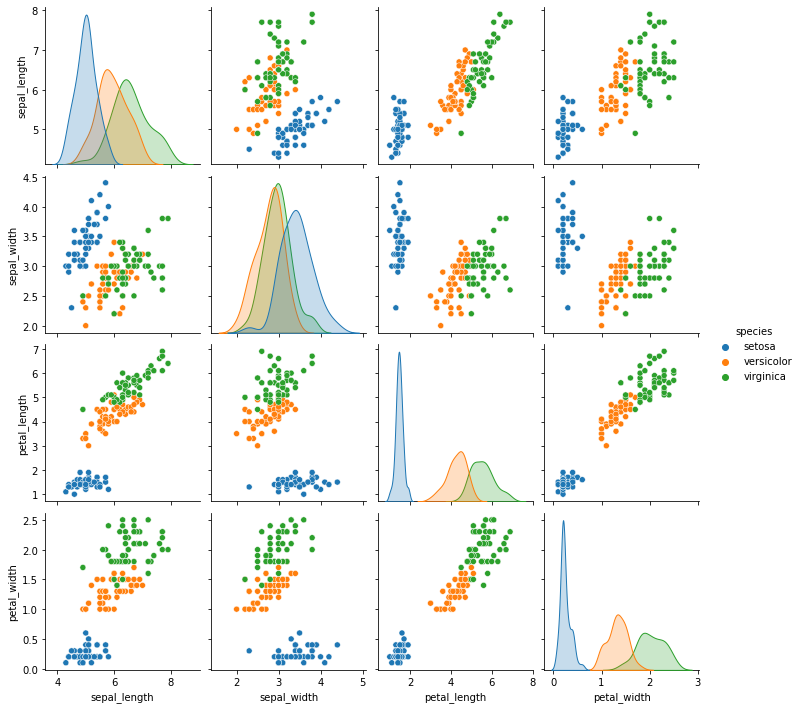

In [17]:
sns.pairplot(iris,hue="species")

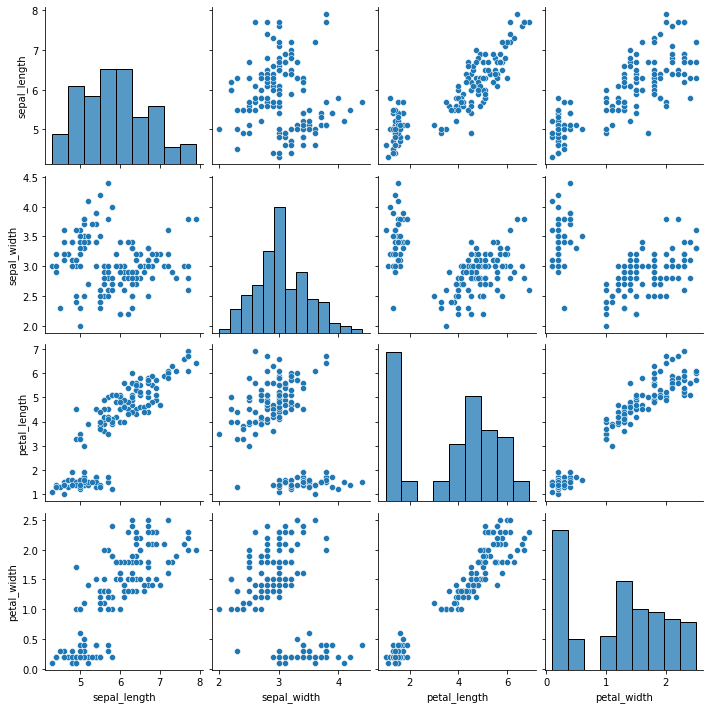

In [18]:
sns.pairplot(iris)

In [19]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:xlabel='species', ylabel='count'>

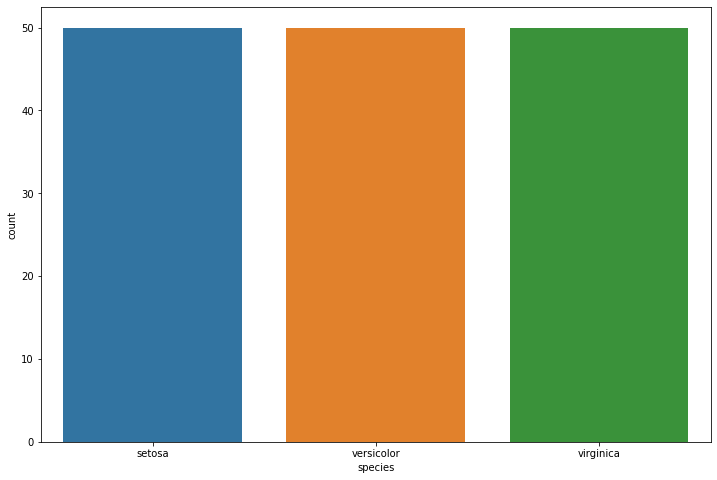

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x='species',data=iris)

## HEATMAP

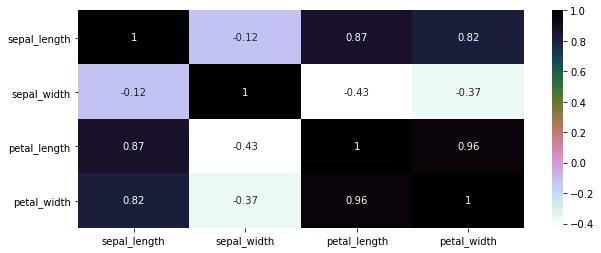

In [21]:
plt.figure(figsize=(10,4))
sns.heatmap(iris.corr(),annot=True,cmap="cubehelix_r")
plt.show()

## SPLITTING THE DATASET INTO TRAINING AND TESTING DATA

In [22]:
X=iris.drop('species',axis=1).values
Y=iris['species'].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

## FITTING USING DECISION TREE ALGORITHM

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
d_train=dtree.fit(X_train,Y_train)

## PREDICTION

In [24]:
y_pred=dtree.predict(X_test)

## ACCURACY SCORE

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,Y_test)

1.0

In [26]:
print("Accuracy of Decision Tree on Best Parameters",accuracy_score(Y_test,y_pred))

Accuracy of Decision Tree on Best Parameters 1.0


## EVALUATING THE ALGORITHM

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
features=['sepal_length','sepal_width','petal_length','petal_width']
targets=['iris-setosa','iris-versicolor','iris-virginica']

#### Hereafter, we train and test our decision tree and here is the visualization of the final decision tree using Graphviz

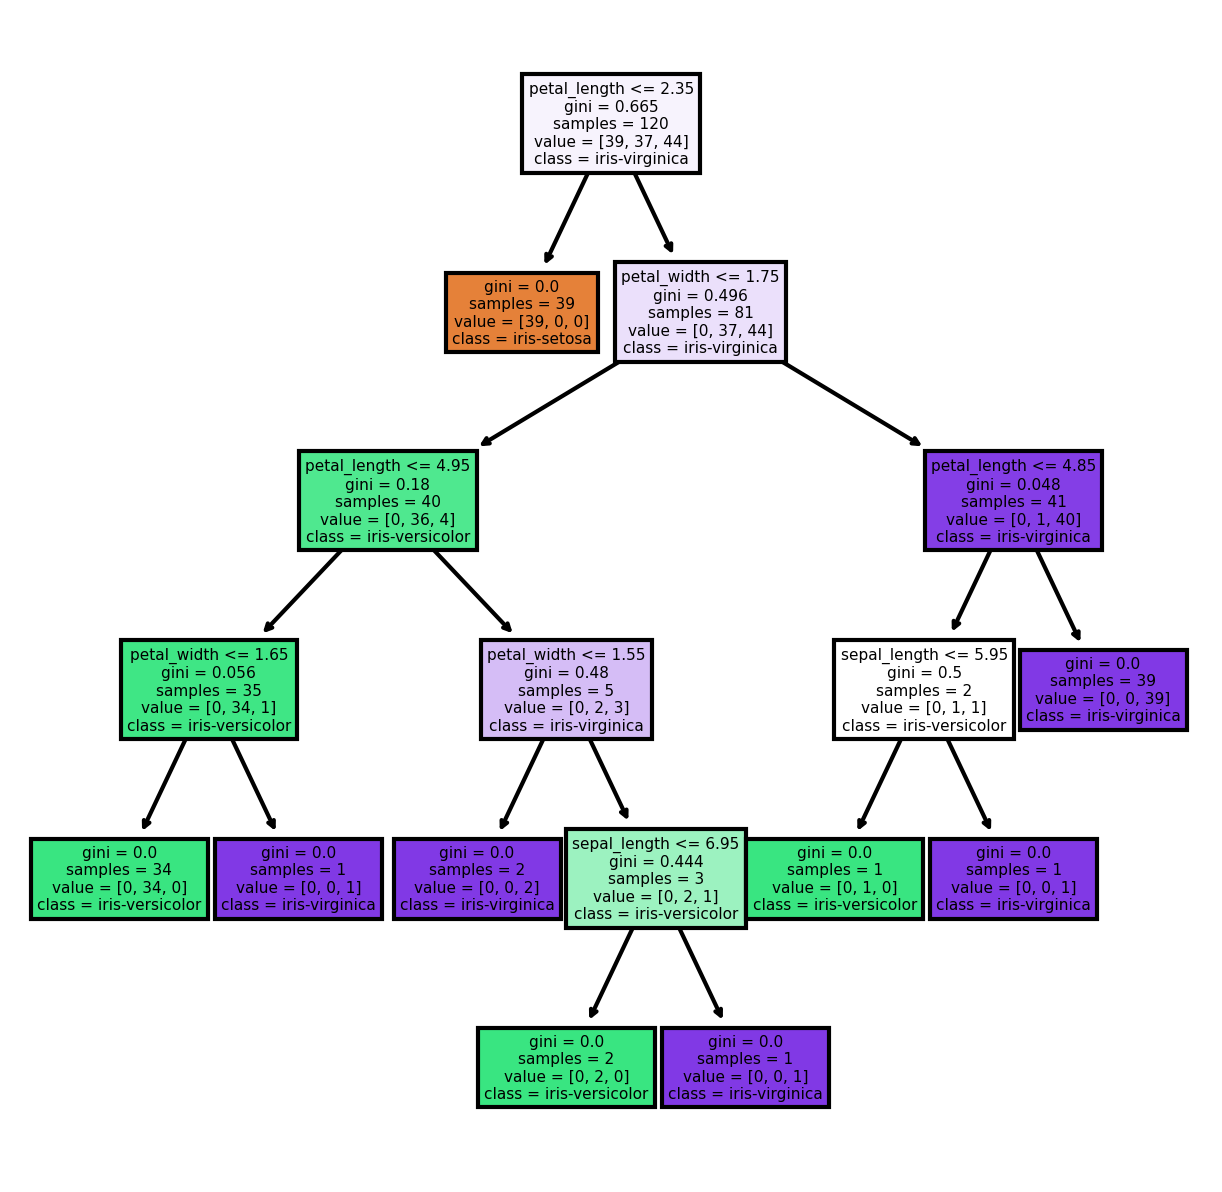

In [29]:
from sklearn.tree import plot_tree
from sklearn import tree
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(dtree,feature_names=features,class_names=targets,filled=True)
plt.show()

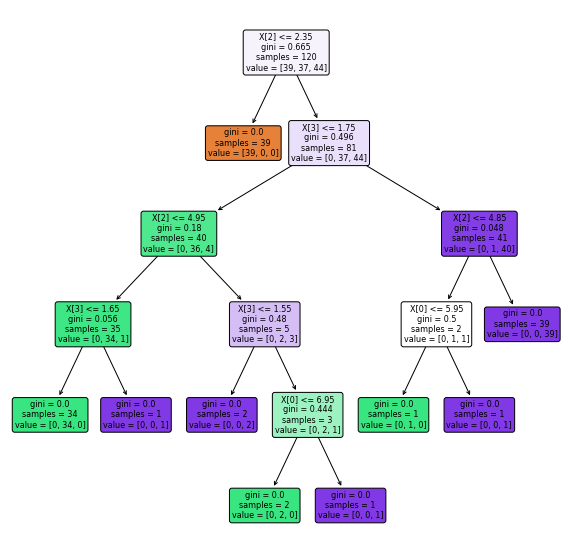

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(dtree,rounded=True,filled=True)
plt.show()